## Imports

In [1]:
# Import the necessary libraries
import sys 
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

ImportError: No module named pandas

# Data Cleaning and Formatting

## Loading Data

In [2]:
# Reading the file
game_stats = pd.read_csv("Board_Game_Data.csv")

In [3]:
game_stats.head()

,Name,Rank,ID,Year Published,Min Players,Max Players,Playing Time,Min Playing Time,Max Playing Time,Owned,...,Family Game Rank,Party Game Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
0,Gloomhaven,1,174430,2017,1,4,120,60,120,33539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pandemic Legacy: Season 1,2,161936,2015,2,4,60,60,60,45392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Through the Ages: A New Story of Civilization,3,182028,2015,2,4,240,180,240,17656,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Terraforming Mars,4,167791,2016,1,5,120,120,120,40782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Twilight Struggle,5,12333,2005,2,2,180,120,180,44884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Types

In [4]:
game_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16300 entries, 0 to 16299
Data columns (total 59 columns):
Name                           16300 non-null object
Rank                           16300 non-null int64
ID                             16300 non-null int64
Year Published                 16300 non-null int64
Min Players                    16300 non-null int64
Max Players                    16300 non-null int64
Playing Time                   16300 non-null int64
Min Playing Time               16300 non-null int64
Max Playing Time               16300 non-null int64
Owned                          16300 non-null int64
Users Rated                    16300 non-null int64
Average Rating                 16300 non-null float64
Bayes Average Rating           16300 non-null float64
Age                            16300 non-null int64
Complexity Rating              16300 non-null float64
Comments                       16300 non-null int64
Wishing                        16300 non-null int64


## Missing data and Outliers

### Check for missing values

In [5]:
for column in game_stats.columns:
    if game_stats[column].isnull().sum()>0:
        print(str(column)+ " " +  str(game_stats[column].isnull().sum()) + " " +str(game_stats[column].isnull().sum()/len(game_stats)*100))
#         if (game_stats[column].isnull().sum()/len(game_stats)*100 < 80):
#             print(str(column)+ " " +  str(game_stats[column].isnull().sum()) + " " +
#                   str(game_stats[column].isnull().sum()/len(game_stats)*100))

Num Players Recommended 5883 36.0920245398773
Num Players Best 990 6.073619631901841
Thematic Rank 15325 94.01840490797547
Strategy Game Rank 14478 88.82208588957056
Num Players Not Recommended 6131 37.61349693251534
War Game Rank 13452 82.52760736196319
Customizable Rank 16023 98.30061349693253
Abstract Game Rank 15373 94.31288343558282
Family Game Rank 14586 89.48466257668711
Party Game Rank 15815 97.02453987730061
Children's Game Rank 15590 95.6441717791411
RPG Item Rank 16299 99.99386503067484
Accessory Rank 16299 99.99386503067484
Video Game Rank 16299 99.99386503067484
Amiga Rank 16299 99.99386503067484
Commodore 64 Rank 16299 99.99386503067484
Arcade Rank 16299 99.99386503067484
Atari ST Rank 16299 99.99386503067484


The columns with rank are expected to have missing values since all the games dont belong to all categories. And the num players columns are dependent on the poll taken by users, thus it might have missing values. 

In [6]:
game_stats[~game_stats['Video Game Rank'].isnull()]

,Name,Rank,ID,Year Published,Min Players,Max Players,Playing Time,Min Playing Time,Max Playing Time,Owned,...,Family Game Rank,Party Game Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
11189,Ataxx,11190,91313,1990,0,0,0,0,0,17,...,NaN,NaN,NaN,NaN,NaN,4514.0,185.0,136.0,137.0,111.0


In [7]:
game_stats[~game_stats['RPG Item Rank'].isnull()]

,Name,Rank,ID,Year Published,Min Players,Max Players,Playing Time,Min Playing Time,Max Playing Time,Owned,...,Family Game Rank,Party Game Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
1047,Legacy of Dragonholt,1048,234669,2017,1,6,999,60,999,2997,...,NaN,NaN,NaN,334.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
game_stats[~game_stats['Accessory Rank'].isnull()]

,Name,Rank,ID,Year Published,Min Players,Max Players,Playing Time,Min Playing Time,Max Playing Time,Owned,...,Family Game Rank,Party Game Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
3830,Miscellaneous Game Accessory,3831,5985,0,0,0,0,0,0,1076,...,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN


<b>Conclusion</b>

The given 5 columns only have one row: 'Video Game Rank', 'Amiga Rank', 'Commodore 64 Rank', 'Arcade Rank', 'Atari ST Rank' 
and they all belong to the same row.

The following columns have one row each as well and can be ignored for the purpose of our analysis: RPG Item Rank, Accessory Rank

In [9]:
game_stats.drop(['Video Game Rank', 'Amiga Rank', 'Commodore 64 Rank', 'Arcade Rank', 
                 'Atari ST Rank', 'RPG Item Rank', 'Accessory Rank'], axis=1, inplace=True)

### Getting unique values in all columns

In [10]:
for column in game_stats.columns:
    print(column)
    print(len(game_stats[column].unique()))
    print(game_stats[column].unique())

Name
15991
['Gloomhaven' 'Pandemic Legacy: Season 1'
 'Through the Ages: A New Story of Civilization' ... 'Nero' 'Coaster Park'
 'Uncle Wiggily']
Rank
16300
[    1     2     3 ... 16298 16299 16300]
ID
16300
[174430 161936 182028 ...   4367 232895   3074]
Year Published
175
[ 2017  2015  2016  2005  2012  2011  2002  2013  2007  2014  2006  2004
  2008  2018  2010  1995  2009  1981  1997  1876  1999  1991  2000 -2200
  2003  1996  1993  1986  1998  2001  1985  1964  1992  1979  1980  1982
  1994  1990  1983  1475  1989  1977  1959  1925  1630  1800  1850  1984
  1988  1987  1810  1971  1978   762  1974  1000 -3000  1973  1962     0
  1848  1947  1938  1903  1948  1895  1960  1976  1745  1967  1930  1864
  1906  1972  1970  1975  1946  1966  1965  1883   400  1969  1701  1942
  1600  1430  1963  1939  1904  1932  1780  1968  1909   700  1921  1870
  1956  1663  1951  2019  1715  1885  1425   550  1955  1860  1958  1680
  1796 -3500  1890  1830  1887  1889  1954  1892  1881  1911  1802  

["['Campaign Games', 'Components: Miniatures', 'Crowdfunding: Kickstarter', 'Gloomhaven Universe', 'Legacy', 'Solitaire Games']"
 "['Campaign Games', 'Legacy', 'Pandemic']" "['Tableau Building']" ...
 "['3D Games', 'Animals: Alligators / Crocodiles', 'Celebrities: Walt Disney', 'Promotional Board Games', 'Sports: Fishing / Angling', 'TV Series: Spongebob Squarepants']"
 "['Celebrities: Walt Disney', 'Knucklebones']"
 "['Animals: Squirrels', 'Card Games: Outplay Games', 'Cartoons: Hanna-Barbera', 'Celebrities: Charles Dickens', 'Celebrities: Enid Blyton', 'Celebrities: Gerry Anderson', 'Cereal Games', 'Characters: Cinderella', 'Characters: Felix The Cat', 'Characters: Hopalong Cassidy', 'Characters: Peter Rabbit', 'Characters: Postman Pat', 'Characters: Sooty', 'Doll Games', 'Music Making & Makers', 'Post Office, Stamps, and Mail', 'Promotional Board Games', 'Roald Dahl', 'Traditional Card Game: War', 'TV Series: Thomas & Friends']"]
Thematic Rank
976
[  1.   2.  nan   3.   4.   5.   9.

In [11]:
for column in game_stats.columns:
    if len(game_stats[column].unique())<50:
        print(column)
        print(len(game_stats[column].unique()))
        print(game_stats[column].unique())

Min Players
11
[ 1  2  3  5  4  6  8  0  9  7 10]
Max Players
48
[  4   5   2   6   7   8  10   3  12  18 100   1  20  99   9  68  30  13
  16  24  11  75   0  15  21  50  52  34 200  33 999  38  22  14  41  64
 127  40  45  17  31  32  36  25  42  61 362  48]
Age
23
[12 13 14 10 17  8 15 11  9 18  7  6  0  5 16  4  3  2 21 42 26  1 25]
Median
1
[0]
Language Dependence
6
['Extensive use of text - massive conversion needed to be playable'
 'Moderate in-game text - needs crib sheet or paste ups'
 'No necessary in-game text'
 'Some necessary text - easily memorized or small crib sheet'
 'Unplayable in another language' ' ']
Suggested Player Age
13
['14' '12' '10' '18' '8' '6' '5' '16' '4' '3' '2' '0' '21 and up']
Game Domains
35
["['Strategy Games', 'Thematic Games']" "['Strategy Games']"
 "['Strategy Games', 'Wargames']" "['Thematic Games', 'Wargames']"
 "['Thematic Games']" "['Customizable Games', 'Thematic Games']"
 "['Abstract Games', 'Family Games']" "['Customizable Games']"
 "['Fami

<b> Conclusion: </b>

We can drop the columns 'Abstract Strategy Games' and 'Median' as they only have a single value

In [12]:
game_stats.drop(['Abstract Strategy Games', 'Median'], axis=1, inplace=True)

### Getting all unique values in columns containing list of lists

#### Game Domains

In [13]:
array = game_stats['Game Domains'].unique()
result = set(x for l in array for x in eval(l))

In [14]:
result

{'Abstract Games',
 "Children's Games",
 'Customizable Games',
 'Family Games',
 'Party Games',
 'Strategy Games',
 'Thematic Games',
 'Wargames'}

#### Game Categories

In [15]:
array_cat = game_stats['Game Categories'].unique()
result_cat = set(x for l in array_cat for x in eval(l))
print(len(result_cat))
result_cat

83


{'Abstract Strategy',
 'Action / Dexterity',
 'Adventure',
 'Age of Reason',
 'American Civil War',
 'American Indian Wars',
 'American Revolutionary War',
 'American West',
 'Ancient',
 'Animals',
 'Arabian',
 'Aviation / Flight',
 'Bluffing',
 'Book',
 'Card Game',
 "Children's Game",
 'City Building',
 'Civil War',
 'Civilization',
 'Collectible Components',
 'Comic Book / Strip',
 'Deduction',
 'Dice',
 'Economic',
 'Educational',
 'Electronic',
 'Environmental',
 'Expansion for Base-game',
 'Exploration',
 'Fantasy',
 'Farming',
 'Fighting',
 'Game System',
 'Horror',
 'Humor',
 'Industry / Manufacturing',
 'Korean War',
 'Mafia',
 'Math',
 'Mature / Adult',
 'Maze',
 'Medical',
 'Medieval',
 'Memory',
 'Miniatures',
 'Modern Warfare',
 'Movies / TV / Radio theme',
 'Murder/Mystery',
 'Music',
 'Mythology',
 'Napoleonic',
 'Nautical',
 'Negotiation',
 'Novel-based',
 'Number',
 'Party Game',
 'Pike and Shot',
 'Pirates',
 'Political',
 'Post-Napoleonic',
 'Prehistoric',
 'Print & 

#### Game Mechanics

In [16]:
array_mech = game_stats['Game Mechanics'].unique()
result_mech = set(x for l in array_mech for x in eval(l))
print(len(result_mech))
result_mech

51


{'Acting',
 'Action / Movement Programming',
 'Action Point Allowance System',
 'Area Control / Area Influence',
 'Area Enclosure',
 'Area Movement',
 'Area-Impulse',
 'Auction/Bidding',
 'Betting/Wagering',
 'Campaign / Battle Card Driven',
 'Card Drafting',
 'Chit-Pull System',
 'Commodity Speculation',
 'Cooperative Play',
 'Crayon Rail System',
 'Deck / Pool Building',
 'Dice Rolling',
 'Grid Movement',
 'Hand Management',
 'Hex-and-Counter',
 'Line Drawing',
 'Memory',
 'Modular Board',
 'Paper-and-Pencil',
 'Partnerships',
 'Pattern Building',
 'Pattern Recognition',
 'Pick-up and Deliver',
 'Player Elimination',
 'Point to Point Movement',
 'Press Your Luck',
 'Rock-Paper-Scissors',
 'Role Playing',
 'Roll / Spin and Move',
 'Route/Network Building',
 'Secret Unit Deployment',
 'Set Collection',
 'Simulation',
 'Simultaneous Action Selection',
 'Singing',
 'Stock Holding',
 'Storytelling',
 'Take That',
 'Tile Placement',
 'Time Track',
 'Trading',
 'Trick-taking',
 'Variable Ph

There are 51 unique types of game mechanics.

Checking which game mechanic is the most popular one? and the same for the others checked above and below

#### Game Family

In [17]:
array_fam = game_stats['Game Family'].unique()
result_fam = set(x for l in array_fam for x in eval(l))
print(len(result_fam))
result_fam

2149


{'Provinces: Quebec',
 'Barbie',
 'Kings of War',
 'Rum & Bones',
 'Characters: 101 Dalmatians',
 'Super Mario Bros.',
 'Werewolf / Mafia',
 'Dungeoneer',
 'Magic: The Gathering',
 'Magazine: C3i',
 'Star Trek Deck Building Game',
 'Blocks Series',
 'Mage Knight Universe',
 'Mice and Mystics',
 'Escape Room Games',
 'Zombies!!!',
 'Characters: Austin Powers',
 'Halma',
 'HABA Fex: Fostering Executive Functions series',
 'Islands: Crete',
 'Onsworld Jackpot Dice',
 'Comics: King Features Syndicate',
 'Battleground Fantasy Warfare',
 'Scrabble',
 'Ligretto',
 'Weapons & Warriors',
 'Cities: Kharkov',
 'Characters: Felix The Cat',
 '"Storm Over" area impulse series',
 "Watch Ya' Mouth",
 'Battlestations',
 "Pegasus Children's Games",
 'Sports Teams: New York Yankees',
 'Animals: Fleas',
 'Dreamwars',
 "Characters: Capt'n Sharky",
 'Squad Leader Series',
 'Set games',
 'Mr. Jack',
 'Cities: Medina',
 'Treasure Hunter',
 'Wordquest!',
 'Motorcycle',
 'Advanced Squad Leader',
 'Card Games: O

#### Game Artists

In [18]:
array_art = game_stats['Game Artists'].unique()
result_art = set(x for l in array_art for x in eval(l))
print(len(result_art))
result_art

8626


{'Richard Cortes',
 'Liesel Laüterborn',
 'Sean Platter',
 'Santiago Villa',
 'Vasily Grigorevich Perov',
 'Jeff Billings',
 'Steven Cavallo',
 'Pedro Sena',
 'Mike Capprotti',
 'Ben Knight',
 'Orlando Telmo Couto',
 'Will Schoonover',
 'Dan Misson',
 'Jung Park',
 'Choi Wan Lee',
 'J. Edwin Stevens',
 'Neil Martin',
 'Pavel Širůček',
 'John Derek Murphy',
 'Gyula Molnár',
 'Daniel Souto',
 'Steven Sanders',
 'Lorraine Schleter',
 'Marie Leviel',
 'Piotr Łukaszewski',
 'Kaile Dutton',
 'Casey Edwards',
 'Juha Järvinen',
 'Gerald Brom',
 'Jason Juta',
 'Jason Gillis',
 'Francois Chollet',
 'Rafal Szymanski',
 'Alejandro Lee',
 'V. M. Wyman',
 'Tom Simonton',
 'Marc Scheff',
 'Manuel Carvalho',
 'Tony Cottrell',
 '舟岡 (Hunaoka)',
 'Bernardo Martorell',
 'Emi Tanji',
 'Julius Stafford Baker',
 'Yating Sun',
 'Zhang Jiazhen',
 'Chang Yuan',
 'Kiyoshi Saitō',
 'Phil Walker-Harding',
 'Junior Garza',
 'William Hyde',
 'David Shaw (I)',
 'David Wyatt',
 'Yoshino Himori',
 'Michael D. Clark',
 

#### Game Designers

In [19]:
array_des = game_stats['Game Designers'].unique()
result_des = set(x for l in array_des for x in eval(l))
print(len(result_des))
result_des

7663


{'Piet Hein',
 'Richard J. Trup',
 'Steve Ryan',
 'Jeff Billings',
 'Charles Titus',
 'Mike Drysdale',
 'Sheri Robinette',
 'Ben Knight',
 'Joe Ploch',
 'Will Schoonover',
 'Kim Meints',
 'Roger Gerrish',
 'Alfredo Genovese',
 'Jerry Shiles',
 'Jean-Luc Renaud',
 'John Parmalee',
 'Kevin Chang',
 'Veli-Matti Saarinen',
 'Nico Pirard',
 'Robert F. Watson',
 'Catherine Thomson',
 'Ben Leijten',
 'Edward Sindelar',
 'Danny Lott',
 'Bastion',
 'Thomas Kjølby Laursen',
 'Thomas Sing',
 'Mark Forsyth',
 'John C. Douglass',
 'Tom Filsinger',
 'Franck Yeghicheyan',
 'Reginald Janssens',
 'James Brunot',
 'Víctor Manuel Hernández Román',
 'Sean Weitner',
 'Seth Van Orden',
 'Paolo Mori',
 'Phil Walker-Harding',
 'Jiří Dvořák',
 'Sam Ritchie',
 'Julian Miller',
 'Victor Melo',
 'David Shaw (I)',
 'H. Jean Vanaise',
 'Eric Hotz',
 'Lluís Collelldemont',
 'C. H. Dilek',
 'Peter Schackert',
 'Dave Grigger',
 'Harry Obst',
 'A. P. Nienstaedt',
 'Maurizio Favoni',
 'Mark Rivera',
 'Dasmond. L',
 'Luc

# Exploratory Data Analysis

## Single Variable Plots

### Age

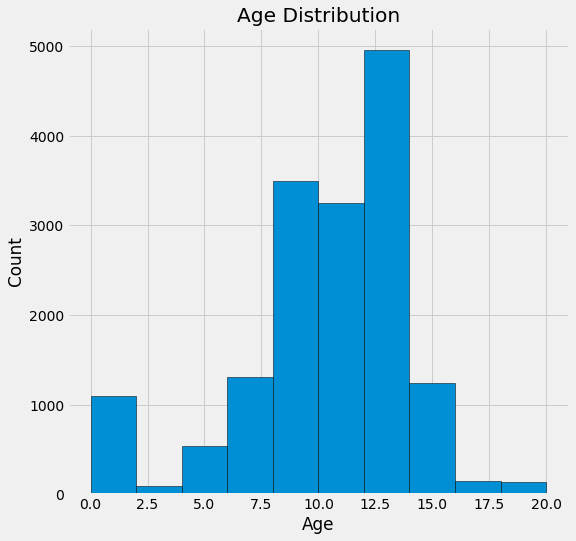

In [20]:
figsize(8, 8)

# Histogram of Age
plt.style.use('fivethirtyeight')
plt.hist(game_stats['Age'], bins =[0,2,4,6,8,10,12,14,16,18,20], edgecolor = 'k');
plt.xlabel('Age'); plt.ylabel('Count'); 
plt.title('Age Distribution');

In [21]:
game_stats['Age'].value_counts()

12    4035
8     3221
10    3171
14    1127
0     1099
13     924
6      696
7      618
5      340
9      280
4      197
18     133
15     119
16     115
3       88
11      81
17      35
2        9
21       8
26       1
25       1
1        1
42       1
Name: Age, dtype: int64

<b> Conclusion </b>

Most games can be played by kids above 8 years of age.

### Games Domain Distribution

C:\Users\adity\Anaconda3\lib\site-packages\numpy\lib\histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


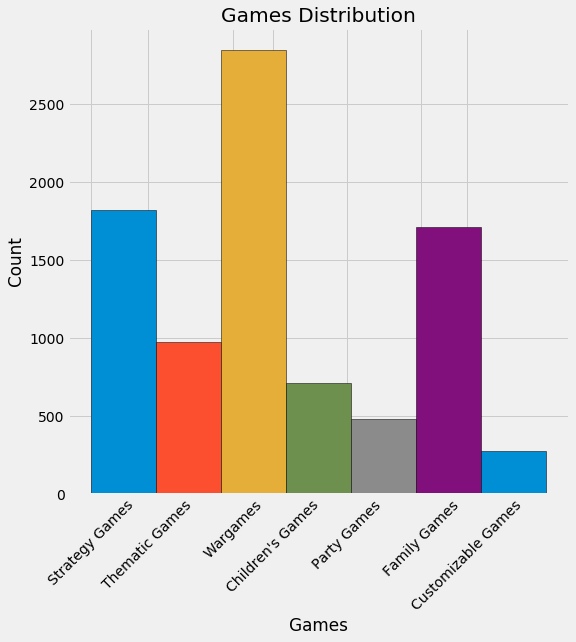

In [22]:
labels = ['Strategy Games', 'Thematic Games', 'Wargames', "Children's Games",
          'Party Games', 'Family Games', 'Customizable Games']
plt.hist([game_stats[game_stats['Strategy Games']==True]['Strategy Games'],
          game_stats[game_stats['Thematic Games']==True]['Thematic Games'],
          game_stats[game_stats['Wargames']==True]['Wargames'],
          game_stats[game_stats["Children's Games"]==True]["Children's Games"],
          game_stats[game_stats['Party Games']==True]['Party Games'], 
          game_stats[game_stats['Family Games']==True]['Family Games'], 
          game_stats[game_stats['Customizable Games']==True]['Customizable Games']], 
          bins = 1, edgecolor = 'k', label = labels);
plt.xlabel('Games'); plt.ylabel('Count'); 
plt.xticks((0.6,0.7,0.85,0.92,1.05,1.18,1.26),labels,rotation=45);
plt.title('Games Distribution');

<b> Conclusion </b>

In the top ranking games, Wargames are the most popular, followed by Strategy Games and Family Games.

### Year Published Distribution

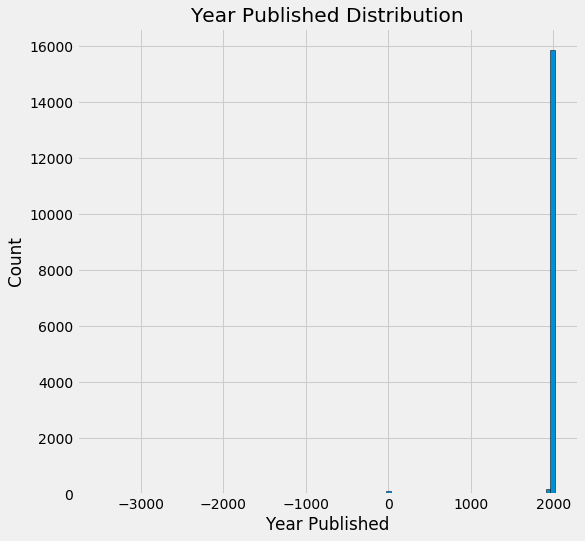

In [23]:
plt.hist(game_stats['Year Published'], bins = 100, edgecolor = 'k');
plt.xlabel('Year Published'); plt.ylabel('Count'); 
plt.title('Year Published Distribution');


There seems to be something weird happening in this graph with the distribution going as far as -3000. Let's explore it further.

In [24]:
min(game_stats['Year Published'])

-3500

In [25]:
# Copy this for other distributions as well
types = game_stats['Year Published'].value_counts()
types = list(types[types.values > 70].index)
types

[2016,
 2017,
 2015,
 2014,
 2013,
 2012,
 2018,
 2011,
 2010,
 2009,
 2008,
 2005,
 2007,
 2006,
 2004,
 2003,
 2002,
 2001,
 2000,
 1999,
 1998,
 1997,
 1995,
 1996,
 1992,
 1993,
 1994,
 1991,
 1986,
 1981,
 1990,
 0,
 1987,
 1989,
 1985,
 1988,
 1979,
 1980,
 1982,
 1983,
 1975,
 1977,
 1984,
 1978]

Board games as far as -3500 BC have been added to the rankings. 

Let's focus on games within 1980 to 2018 to see how many games were published in this period.

In [26]:
game_stats[(game_stats['Year Published']>1980) & (game_stats['Year Published']<2018)]['Year Published'].value_counts()

2016    1073
2017    1012
2015    1006
2014     885
2013     787
2012     757
2011     677
2010     638
2009     594
2008     547
2005     517
2007     504
2006     487
2004     462
2003     394
2002     311
2001     285
2000     274
1999     258
1998     227
1997     211
1995     209
1996     201
1992     188
1993     170
1994     168
1991     162
1986     141
1981     140
1990     136
1987     126
1989     122
1985     122
1988     121
1982     110
1983     110
1984      87
Name: Year Published, dtype: int64

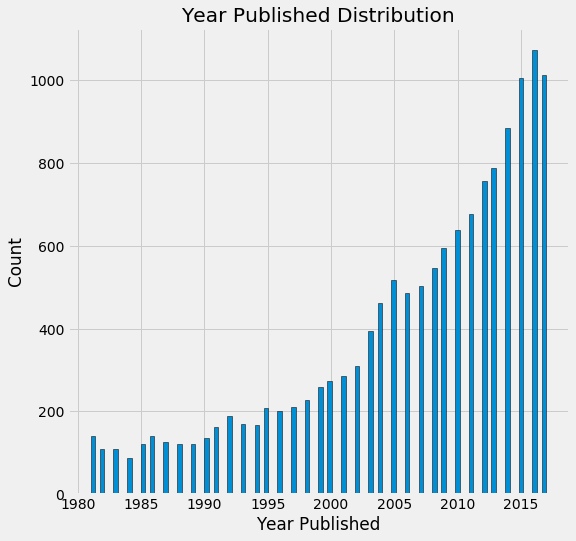

In [27]:
plt.hist(game_stats[(game_stats['Year Published']>1980) & (game_stats['Year Published']<2018)]['Year Published']
         , bins = 100, edgecolor = 'k');
plt.xlabel('Year Published'); plt.ylabel('Count'); 
plt.title('Year Published Distribution');

Top rankings games published within the last 40 years have been steadily increasing. 

### Complexity Rating Distribution

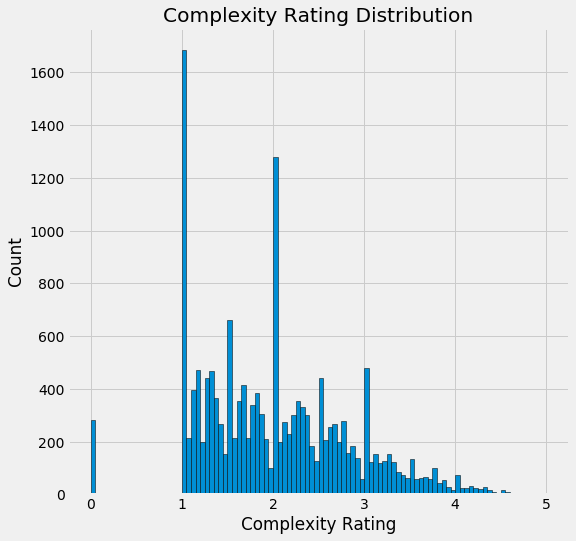

In [28]:
plt.hist(game_stats['Complexity Rating'], bins = 100, edgecolor = 'k');
plt.xlabel('Complexity Rating'); plt.ylabel('Count'); 
plt.title('Complexity Rating Distribution');

Games with a complexity rating of 1 are the most popular followed by a rating of 2. Popularity decreases as the complexity rating increases.

### Std Deviation Distribution

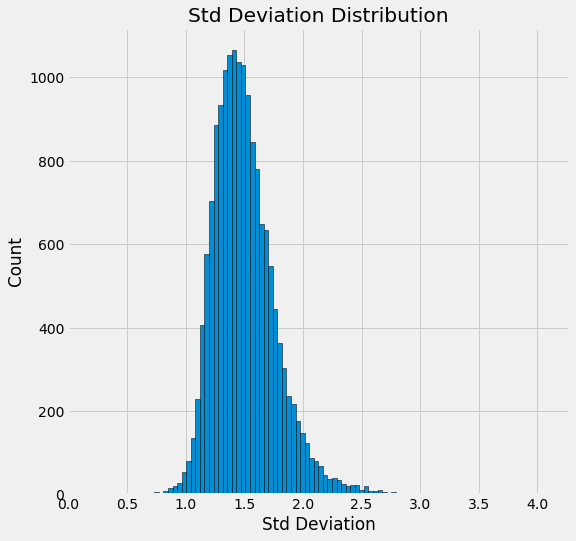

In [29]:
plt.hist(game_stats['Std Deviation'], bins = 100, edgecolor = 'k');
plt.xlabel('Std Deviation'); plt.ylabel('Count'); 
plt.title('Std Deviation Distribution');

### Playing Time Distribution

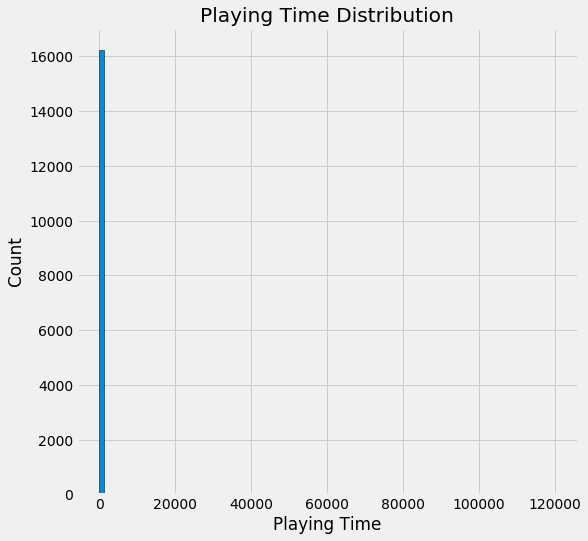

In [30]:
plt.hist(game_stats['Playing Time'], bins = 100, edgecolor = 'k');
plt.xlabel('Playing Time'); plt.ylabel('Count'); 
plt.title('Playing Time Distribution');

Again there appears to be anomalous behaviour

In [31]:
game_stats['Playing Time'].value_counts()

30        2942
60        2380
45        1689
20        1614
120       1320
90        1266
15         930
180        664
10         630
0          598
240        446
40         329
360        299
25         166
300        134
75         130
5          110
150        105
50          88
35          58
480         40
100         35
80          31
600         26
70          24
1           23
720         17
1200        16
210         13
420         11
          ... 
2100         1
85           1
165          1
39           1
280          1
660          1
60000        1
14400        1
95           1
8            1
700          1
38           1
1080         1
290          1
120000       1
5400         1
22500        1
19           1
42           1
115          1
750          1
68           1
2480         1
108          1
33           1
23           1
17           1
222          1
340          1
999          1
Name: Playing Time, Length: 99, dtype: int64

In [32]:
len(game_stats[game_stats['Playing Time']>120])

1883

<b> Conclusion </b>

More than half of the games can be played within less than an hour.

About 90% of the games have a playing time of 2 hours or less.

In [33]:
game_stats_temp = game_stats[game_stats['Playing Time']>120]
game_stats_temp

,Name,Rank,ID,Year Published,Min Players,Max Players,Playing Time,Min Playing Time,Max Playing Time,Owned,...,Thematic Rank,Strategy Game Rank,Game Artists,Num Players Not Recommended,War Game Rank,Customizable Rank,Abstract Game Rank,Family Game Rank,Party Game Rank,Children's Game Rank
2,Through the Ages: A New Story of Civilization,3,182028,2015,2,4,240,180,240,17656,...,NaN,3.0,"['Jakub Politzer', 'Milan Vavroň']",[1],NaN,NaN,NaN,NaN,NaN,NaN
4,Twilight Struggle,5,12333,2005,2,2,180,120,180,44884,...,NaN,7.0,"['Viktor Csete', 'Rodger B. MacGowan', 'Chechu...",[1],1.0,NaN,NaN,NaN,NaN,NaN
5,Star Wars: Rebellion,6,187645,2016,2,4,240,180,240,22790,...,3.0,6.0,[],"[1, 3, 4]",NaN,NaN,NaN,NaN,NaN,NaN
7,Gaia Project,8,220308,2017,1,4,150,60,150,8918,...,NaN,5.0,['Dennis Lohausen'],NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Great Western Trail,9,193738,2016,2,4,150,75,150,19846,...,NaN,8.0,['Andreas Resch'],[1],NaN,NaN,NaN,NaN,NaN,NaN
9,Terra Mystica,10,120677,2012,2,5,150,60,150,34322,...,NaN,10.0,['Dennis Lohausen'],[1],NaN,NaN,NaN,NaN,NaN,NaN
11,War of the Ring (Second Edition),12,115746,2012,2,4,180,150,180,14592,...,4.0,NaN,"['John Howe', 'Fabio Maiorana']","[1, 3, 4]",2.0,NaN,NaN,NaN,NaN,NaN
13,The 7th Continent,14,180263,2017,1,4,1000,5,1000,15168,...,5.0,NaN,['Ludovic Roudy'],[4],NaN,NaN,NaN,NaN,NaN,NaN
14,Twilight Imperium (Fourth Edition),15,233078,2017,3,6,480,240,480,6531,...,NaN,11.0,['Scott Schomburg'],"[1, 2]",NaN,NaN,NaN,NaN,NaN,NaN
15,Puerto Rico,16,3076,2002,2,5,150,90,150,63220,...,NaN,21.0,"['Harald Lieske', 'Franz Vohwinkel']","[1, 2]",NaN,NaN,NaN,NaN,NaN,NaN


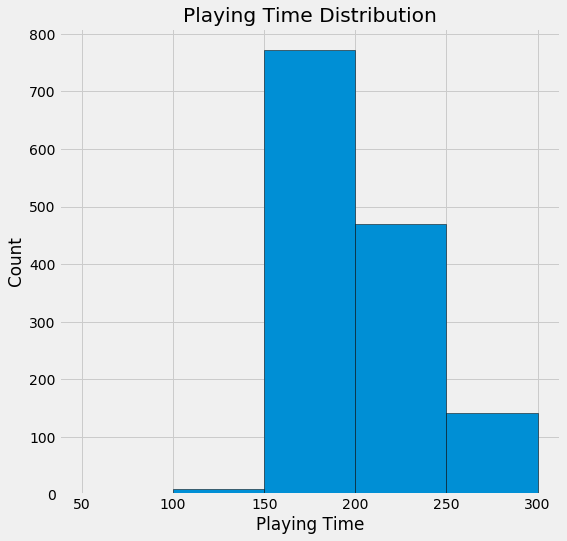

In [34]:
plt.hist(game_stats[(game_stats['Playing Time']>120)]['Playing Time'], bins = [50,100,150,200,250,300], edgecolor = 'k');
plt.xlabel('Playing Time'); plt.ylabel('Count'); 
plt.title('Playing Time Distribution');

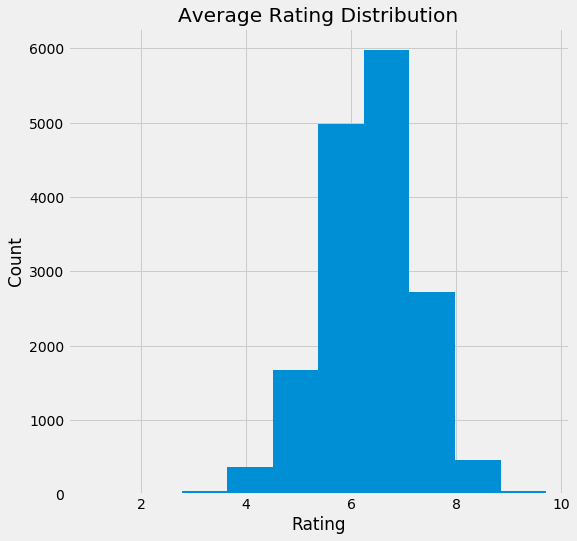

In [35]:
#MAKE A HISTOGRAM OF ALL RATINGS IN THE AVERAGE_RATING COLUMN
plt.hist(game_stats["Average Rating"])
plt.xlabel('Rating'); plt.ylabel('Count'); 
plt.title('Average Rating Distribution');
plt.show()

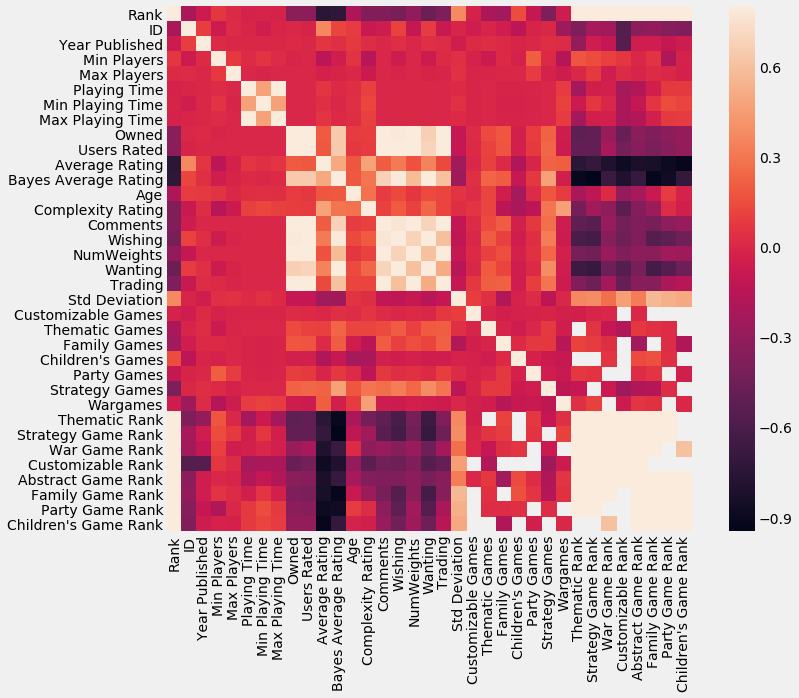

In [36]:
#correlation matrix
corrmat = game_stats.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [37]:
# Get all the columns from the dataframe.
columns = game_stats.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["Name","Video Games", "Publisher","Secondary Publishers", "Num Players Recommended",
        "Num Players Best", "Abstract Game Rank", "Family Game Rank", "Party Game Rank","Party Games","Wargames",
       "Language Dependence",  "Game Domains","Customizable Games", "Thematic Games", "Family Games","Children's Games",
       "Game Categories", "Game Mechanics", "Game Designers", "Game Family","Thematic Rank","Complexity Rating",
        "Game Artists","Num Players Not Recommended", "War Game Rank", "Customizable Rank","Std Deviation","Strategy Games",
      "Children's Game Rank","Bayes Average Rating","Average Rating","Strategy Game Rank","Suggested Player Age",
        "Trading","Wanting","NumWeights","Age","Users Rated","Wishing","Comments","Owned","ID","Rank"
                                          ]]

# Store the variable we'll be predicting on.
target = "Average Rating"

In [38]:
# Import a convenience function to split the sets.
from sklearn.model_selection import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train = game_stats.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = game_stats.loc[~game_stats.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(13040, 50)
(3260, 50)


In [39]:
# Import the linear regression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
LR = LinearRegression()
# Fit the model to the training data.
LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = LR.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

0.8204424733848658

In [41]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
RFR = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [42]:
# Make predictions.
predictions = RFR.predict(test[columns])
# Compute the error.
mean_squared_error(predictions, test[target])

0.5425882560389041

In [43]:
test[columns].iloc[0]

Year Published      2017
Min Players            1
Max Players            4
Playing Time         120
Min Playing Time      60
Max Playing Time     120
Name: 0, dtype: int64

In [44]:
#MAKE PREDICTIONS WITH BOTH MODELS
rating_LR=LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR=RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

#PRINT THE PREDICTIONS
print(rating_LR)
print(rating_RFR)

[6.55947066]
[7.74444452]


In [45]:
test[target].iloc[0]

8.93034